## Nonparametric Bootstrap: definition

***Nonparametric Bootstrap*** : A statistical method that involves repeatedly resampling the observed data with replacement to generate a large number of bootstrap samples. These samples are used to estimate the sampling distribution of a statistic or to make inferences about population parameters without assuming a specific parametric distribution for the data.

1. Nonparametric bootstrap is advantageous for small sample sizes, where traditional parametric methods can be unreliable.
2. It provides a robust approach when data doesn't conform to specific distributional assumptions.
3. It is useful for estimating parameters, constructing confidence intervals, and conducting hypothesis tests without relying on distribution assumptions.
4. It excels in scenarios involving complex data or when modeling assumptions are uncertain.


## Nonparametric bootstrap: introduction

So suppose that we observe a sample $x_{1},..., x_{n}$ which are realizations of i.i.d. r.v. $X_{1},..., X_{n}$, with distribution $L_{x}$ and with CDF $F_{x}$  unknown.. The empirical Cummulative Distribution Function (eCDF) is defined as

$$
F_{n}(x) = \frac{1}{n} \sum_{i=1}^{n} 1_{x_{i} \leq x}  
$$

and is an estimator of the true CDF $F_{x}$. Moreover, we have that

$$
\begin{align*} 
E[F_{n}(x)] =  F_{x}\\
\end{align*} 
$$

and  

$$
\begin{align*} 
var \big( F_{n}(x) \big) = \frac{1}{n} \bigg( \big( F_{x}
\big) \big( 1 - F_{x}  \big)  \bigg) \\
\end{align*}
$$


Besides, from the Law of Large Numbers (LLN), we have that

$$
 F_{n}(x) \xrightarrow{\ a.s. \ } F_{x} \ \ \ \ \ \ \ \ \ \ \text{as $n$ goes to $\infty$.}
$$

And from the Central Limit Theorem (CLT), we have that

$$
 F_{n}(x) \xrightarrow{\ L \ } N\bigg(F_{x}, \frac{1}{n}F_{x}\big( 1 - F_{x}  \big)  \bigg)  \ \ \ \ \ \ \ \ \ \ \text{as $n$ goes to $\infty$.}
$$


The underlying idea of nonparametric bootstrap is that bootstrap samples can be generated from the  $F_{n}(x)$ when $F_{x}$ is unknow since $ F_{n}(x)$ is a consistent estimator for $F_{x}$ .


## General algorithm

1. $B$ independent samples $x_{b1}^{*},..., x_{bn}^{*}$, $b = 1,..., B$ are drawn with replacement from the data $x_{1},..., x_{n}$. This is important, we resample with replacement from the data to obtain bootstrap samples.


2. On each of the $B$ independent samples,  an estimate $\hat{\theta}_{b}^{*}$ is computed (the bootstrap replicates of $\hat{\theta}$).


3. The expectation of $\hat{\theta}$ (given $ F_{n}(x)$ ) is estimated as follows:

$$
E_{boot} \big[ \hat{\theta}  \big] = \frac{1}{B} \sum_{b=1}^{B} \hat{\theta}_{b}^{*}
$$

4. The variance of $\hat{\theta}$ (given $ F_{n}(x)$ ) is estimated as follows:

$$
var_{boot} \big( \hat{\theta}  \big) = \frac{1}{B-1} \sum_{b=1}^{B} \bigg( \hat{\theta}_{b}^{*} - \frac{1}{B} \sum_{b=1}^{B} \hat{\theta}_{b}^{*}
 \bigg)^{2}
$$


We observe a sample $x_{1}, ..., x_{n} = 8.26, 6.33, 10.4, 5.27, 5.35, 5.61, 6.12, 6.19, 5.2, 7.01, 8.74, 7.78, 7.02, 6, 6.5, 5.8, 5.12, 7.41, 6.52, 6.21, 12.28, 5.6, 5.38, 6.6, 8.74$. 


Estimate the bias and the standard error of $\hat{\theta}$, the estimate of the coefficient of variation. The coefficient of variation cv is equal to

$$
cv = sd(x) / mean(x)
$$




In [7]:
import numpy as np
import pandas as pd

# dataset
x = np.array([8.26, 6.33, 10.4, 5.27, 5.35, 5.61, 6.12, 6.19, 5.2, 7.01, 8.74, 7.78,
              7.02, 6, 6.5, 5.8, 5.12, 7.41, 6.52, 6.21, 12.28, 5.6, 5.38, 6.6, 8.74])

# coefficient of variation (CV)
cv = np.std(x) / np.mean(x)
cv # 0.24737024423748963

# bootstrap
num_bootstraps = 10000
bootstrap_cvs = np.zeros(num_bootstraps)
np.random.seed(2023)
for i in range(num_bootstraps):
    resample = np.random.choice(x, size=len(x), replace=True)
    bootstrap_cvs[i] = np.std(resample) / np.mean(resample)

# bias and standard error of the CV estimator
bias = np.mean(bootstrap_cvs) - cv
bias #-0.011917596931186353
standard_error = np.std(bootstrap_cvs)
standard_error # 0.04395079547052894

0.04395079547052894

## Plot the bootstrap distribution

Text(0.5, 1.0, 'Bootstrap Distribution of the Coefficient of Variation (cv)')

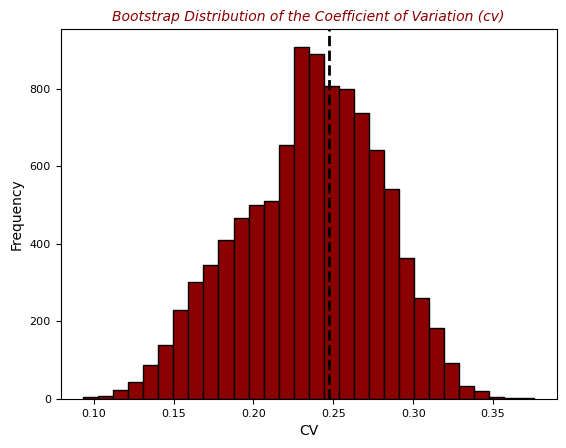

In [10]:
import matplotlib.pyplot as plt

bootstrap_df = pd.DataFrame({'CVs': bootstrap_cvs})

# plot a histogram of bootstrap CVs
plt.hist(bootstrap_df['CVs'], bins=30, color='darkred', edgecolor='black')
plt.axvline(cv, color='black', linestyle='dashed', linewidth=2)
plt.title('Bootstrap Distribution of the Coefficient of Variation (cv)')
plt.xlabel('CV')
plt.ylabel('Frequency')
plt.tick_params(axis='both', labelsize=8)
plt.title('Bootstrap Distribution of the Coefficient of Variation (cv)', fontsize=10, fontstyle='italic', color='darkred')